# Netflix dataset analysis

0. Import Modules and DataFrame, describe DataFrame

Questions:

1. How much of the content on netflix is family/children friendly?
2. Which genre movie or show is most common?
3. Which actor is popular on netflix/ has the most shows/movies on netflix?
4. Is duration correlated with release date? Does the release date predict the duration (movies)?

## 0) Import Modules and DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('./netflix_titles.csv')

In [3]:
df.shape

(6234, 12)

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


## 0) Data Description: 
- there are 6234 entries listed
- some have missing values, e.g. director, cast, country, date_added
- duration is of data type object, because it contains "season" and/or "min"
- date_added is also of data type object, because the month is written as a string
- listed_in is the genre

## Question 4:
How much of the content on netflix is family/children friendly?
##### Waffle diagram of TV-rating

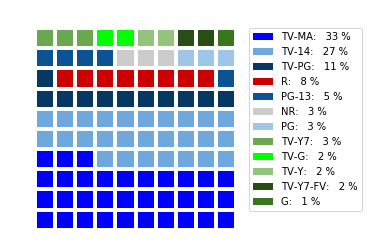

In [6]:
import matplotlib.colors as mcolors

def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    
    #df = pokemon
    #var = 'Type 2'
    
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    percentages = percentages[percentages > 0.5] #drop counts under 0.5
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts



waffle_counts = percentage_blocks(df, 'rating')




color = ["#0000ff",
        "#6fa8dc",
        "#073763",
        "#cc0000",
        "#0b5394",
        "#cccccc",
        "#9fc5e8",
        "#6aa84f",
        "#00ff00",
        "#93c47d",
        "#274e13",
        "#38761d"]

prev_count = 0
color_counter = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y, color=color[color_counter])
    prev_count += waffle_counts[cat]
    color_counter += 1
    


# aesthetic wrangling
#plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.legend(waffle_counts.index + ":   " + waffle_counts[:].values.astype('str') + " %", bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

In [7]:
# rounded percentages:
waffle_counts

TV-MA       33
TV-14       27
TV-PG       11
R            8
PG-13        5
NR           3
PG           3
TV-Y7        3
TV-G         2
TV-Y         2
TV-Y7-FV     2
G            1
Name: rating, dtype: int64

https://en.wikipedia.org/wiki/TV_Parental_Guidelines


- TV-MA: Mature Audience Only.
- TV-14: Parents Strongly Cautioned. ...
- TV-PG: Parental Guidance Suggested. ...
- R: Restricted
- PG-13: Parents Strongly Cautioned
- NR: Not rated
- PG: Parental Guidance Suggested
- TV-Y7: Directed to Older Children. ...
- TV-G: General Audience. ...
- TV-Y: All Children. This program is designed to be appropriate for all children. ...
- TV-Y7-FV: Directed to Older Children- Fantasy Violence. ...
- G: General Audience

## 1) Conclusion 1:
- only about 10% of the content available on netflix is children friendly (green color palette)

- about 40% is adult only (dark blue and red) and 50% with some kind of parental supervisions

## 2) Question 2:
- Which genre of a movie and a show is most common on netflix?

Are "Movie" and "TV Show" the only types?

In [8]:
df1 = df.groupby('type').count()
df1

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,4265,4265,4137,3905,4070,4264,4265,4257,4265,4265,4265
TV Show,1969,1969,128,1759,1688,1959,1969,1967,1969,1969,1969


-> Yes, there are only two types. There are more than twice as much movies than TV shows.

### Movies:

In [9]:
df_movie = df[df.type == 'Movie']
df_movie.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [10]:
df_movie.filter(items = ['type', 'title', 'listed_in']).head(5)

,type,title,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,Stand-Up Comedy
4,Movie,#realityhigh,Comedies
6,Movie,Automata,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Movie,Fabrizio Copano: Solo pienso en mi,Stand-Up Comedy


In [11]:
df_movie.listed_in.nunique()

249

In [12]:
df_movie_genres = df_movie.groupby('listed_in').count().sort_values('show_id', ascending = False).filter(items = ['show_id'])
df_movie_genres.head(10)

,show_id
listed_in,
Documentaries,299
Stand-Up Comedy,273
"Dramas, International Movies",248
"Dramas, Independent Movies, International Movies",186
"Comedies, Dramas, International Movies",174
"Documentaries, International Movies",150
"Children & Family Movies, Comedies",129
Children & Family Movies,120
"Comedies, International Movies",120


In [13]:
unique_genre_dict = {}

for row in df_movie_genres.index:
    for entry in row.split(', '):
        if entry in unique_genre_dict:
            unique_genre_dict[entry] += df_movie_genres.loc[row,'show_id']
        else:
            unique_genre_dict[entry] = df_movie_genres.loc[row,'show_id']

        
#print(unique_genre_dict)
for key in unique_genre_dict:
    print(key + ': ' + str(unique_genre_dict[key]))

Documentaries: 668
Stand-Up Comedy: 281
Dramas: 1623
International Movies: 1927
Independent Movies: 552
Comedies: 1113
Children & Family Movies: 378
Romantic Movies: 376
Action & Adventure: 597
Thrillers: 392
Music & Musicals: 243
Movies: 56
Sports Movies: 157
Sci-Fi & Fantasy: 193
Horror Movies: 262
Anime Features: 45
LGBTQ Movies: 60
Faith & Spirituality: 47
Classic Movies: 84
Cult Movies: 55


In [14]:
unique_genre_list = []    
for value in unique_genre_dict:
    unique_genre_list.append(unique_genre_dict[value])
print(unique_genre_list)



unique_genre_df = pd.DataFrame(data = {'Counts' : unique_genre_list}, index = unique_genre_dict.keys())
unique_genre_df.sort_values(by = 'Counts', ascending=False)

[668, 281, 1623, 1927, 552, 1113, 378, 376, 597, 392, 243, 56, 157, 193, 262, 45, 60, 47, 84, 55]


,Counts
International Movies,1927
Dramas,1623
Comedies,1113
Documentaries,668
Action & Adventure,597
Independent Movies,552
Thrillers,392
Children & Family Movies,378
Romantic Movies,376
Stand-Up Comedy,281


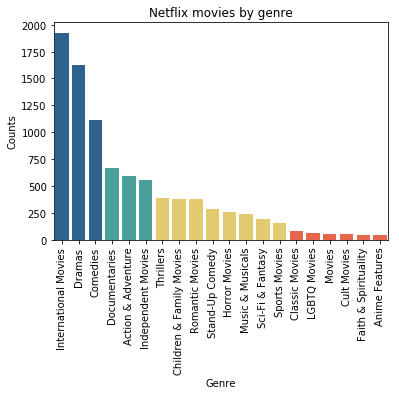

In [15]:
cols = []
cols.extend(["#20639B" for i in range(3)])
cols.extend(["#3CAEA3" for i in range(3)])
cols.extend(["#F6D55C" for i in range(8)])
cols.extend(["#FF5733" for i in range(100)])

palette = sb.color_palette(cols)

sb.barplot(data=unique_genre_df.sort_values(by = 'Counts', ascending = False).transpose(), palette = palette)
plt.xticks(rotation = 90)
plt.title('Netflix movies by genre')
plt.xlabel('Genre')
plt.ylabel('Counts');

### TV shows:
- Which genre of a TV-show is most common on Netflix?

In [16]:
df_show = df[df.type == 'TV Show']
df_show.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...


In [17]:
df_show.filter(items = ['type', 'title', 'listed_in']).head(5)

,type,title,listed_in
2,TV Show,Transformers Prime,Kids' TV
3,TV Show,Transformers: Robots in Disguise,Kids' TV
5,TV Show,Apaches,"Crime TV Shows, International TV Shows, Spanis..."
8,TV Show,Fire Chasers,"Docuseries, Science & Nature TV"
26,TV Show,Castle of Stars,"International TV Shows, Romantic TV Shows, TV ..."


In [18]:
df_show.listed_in.nunique()

212

In [19]:
df_show_genres = df_show.groupby('listed_in').count().sort_values('show_id', ascending = False).filter(items = ['show_id'])
df_show_genres.head(10)

,show_id
listed_in,
Kids' TV,159
"International TV Shows, TV Dramas",92
"Crime TV Shows, International TV Shows, TV Dramas",92
"International TV Shows, Romantic TV Shows, TV Dramas",78
"Kids' TV, TV Comedies",75
"International TV Shows, Romantic TV Shows, TV Comedies",66
Docuseries,65
"Anime Series, International TV Shows",62
"International TV Shows, Korean TV Shows, Romantic TV Shows",56


In [20]:
unique_show_genre_dict = {}

for row in df_show_genres.index:
    for entry in row.split(', '):
        if entry in unique_show_genre_dict:
            unique_show_genre_dict[entry] += df_show_genres.loc[row,'show_id']
        else:
            unique_show_genre_dict[entry] = df_show_genres.loc[row,'show_id']

        
#print(unique_show_genre_dict)
for key in unique_show_genre_dict:
    print(key + ': ' + str(unique_show_genre_dict[key]))

Kids' TV: 328
International TV Shows: 1001
TV Dramas: 599
Crime TV Shows: 363
Romantic TV Shows: 278
TV Comedies: 436
Docuseries: 279
Anime Series: 117
Korean TV Shows: 132
Reality TV: 153
Spanish-Language TV Shows: 117
British TV Shows: 210
Science & Nature TV: 67
Stand-Up Comedy & Talk Shows: 42
TV Mysteries: 69
TV Action & Adventure: 126
TV Horror: 54
TV Shows: 10
TV Thrillers: 44
Teen TV Shows: 44
TV Sci-Fi & Fantasy: 68
Classic & Cult TV: 24


In [21]:
unique_show_genre_list = []    
for value in unique_show_genre_dict:
    unique_show_genre_list.append(unique_show_genre_dict[value])
print(unique_show_genre_list)



unique_show_genre_df = pd.DataFrame(data = {'Counts' : unique_show_genre_list}, index = unique_show_genre_dict.keys())
unique_show_genre_df.sort_values(by = 'Counts', ascending=False)

[328, 1001, 599, 363, 278, 436, 279, 117, 132, 153, 117, 210, 67, 42, 69, 126, 54, 10, 44, 44, 68, 24]


,Counts
International TV Shows,1001
TV Dramas,599
TV Comedies,436
Crime TV Shows,363
Kids' TV,328
Docuseries,279
Romantic TV Shows,278
British TV Shows,210
Reality TV,153
Korean TV Shows,132


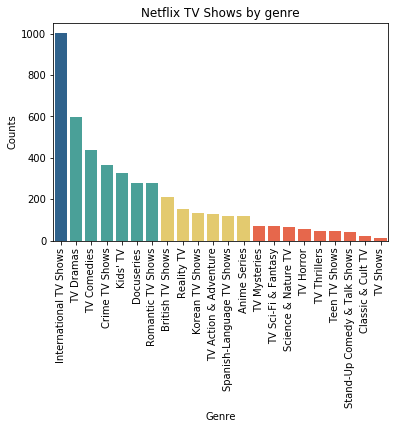

In [22]:
cols = []
cols.extend(["#20639B" for i in range(1)])
cols.extend(["#3CAEA3" for i in range(6)])
cols.extend(["#F6D55C" for i in range(6)])
cols.extend(["#FF5733" for i in range(100)])

palette = sb.color_palette(cols)

sb.barplot(data=unique_show_genre_df.sort_values(by = 'Counts', ascending = False).transpose(), palette = palette)
plt.xticks(rotation = 90)
plt.title('Netflix TV Shows by genre')
plt.xlabel('Genre')
plt.ylabel('Counts');

## 2) Answer 2:

##### Movies:
- There are 20 genres in total.
- There are 3 top genres: International Movies, Dramas and Comedies (blue bars)
- 'International Movies' is not further distinguished. Since this data is not connected to the column "country", we can not conclude if there is a country that produces these "international movies".


##### TV Shows:

- There are 22 genres in total.
- There is one outstanding genre of TV shows: 1001 times a TV show was labeled as International TV Show (not exclusively). It is not obvious which characteristic of a TV show puts it into the genre "International TV show". This could be further analyzed, e.g. pairing country or country of director with the genre.
- Six further genres can be put into the category "top genre" (green bars)


##### Conclusion:
- International movies and TV shows is the most common genre on netflix

## Question 3: Which actor is most frequent on Netflix  shows or movies?

In [23]:
df_cast = df.dropna(subset = ['cast'])
df_cast.shape

(5664, 12)

-> About 600 movies or shows don't have a cast listed

In [24]:
df_cast.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [25]:
df_cast.filter(items =['title','cast']).head()

,title,cast
0,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole..."
1,Jandino: Whatever it Takes,Jandino Asporaat
2,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J..."
3,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ..."
4,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins..."


In [26]:
def multiple_cat_value_count (df, cat_column, separator, identifier):
    '''
    Input: a dataframe with a categorical variable with multiple entries in a row
    
    Output: a new dataframe with the count of the unique values
    '''
    
    
    df = df.groupby(cat_column).count().sort_values(identifier, ascending = False).filter(items = [identifier])
        
    unique_dict = {}

    for row in df.index:
        for entry in row.split(separator):
            if entry in unique_dict:
                unique_dict[entry] += df.loc[row, identifier]
            else:
                unique_dict[entry] = df.loc[row, identifier]


    #print(unique_show_genre_dict)
    #for key in unique_show_genre_dict:
    #    print(key + ': ' + str(unique_show_genre_dict[key]))

    
    unique_list = []    
    for value in unique_dict:
        unique_list.append(unique_dict[value])
    #print(unique_list)



    new_df = pd.DataFrame(data = {'Counts' : unique_list}, index = unique_dict.keys())
    new_df = new_df.sort_values(by = 'Counts', ascending=False)
    
    
    return new_df

In [27]:
df_unique_actor = multiple_cat_value_count(df_cast, 'cast', ', ', 'show_id')
df_unique_actor.head(50)

,Counts
Anupam Kher,33
Shah Rukh Khan,30
Om Puri,27
Naseeruddin Shah,27
Akshay Kumar,26
Yuki Kaji,26
Paresh Rawal,25
Takahiro Sakurai,25
Amitabh Bachchan,24
Boman Irani,23


In [28]:
df_unique_actor.shape

(27405, 1)

In [29]:
#df_cast[df_cast['cast'] == 'Jandino Asporaat']

df_cast[df_cast['cast'].str.contains('Anupam Kher')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
915,70123119,Movie,Wake Up Sid,Ayaan Mukherji,"Ranbir Kapoor, Konkona Sen Sharma, Shruti Bapn...",India,"October 1, 2018",2009,TV-14,132 min,"Comedies, International Movies, Romantic Movies",A spoiled trust fund brat finds himself stuck ...
1436,70107499,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,..."
1494,70185141,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."
1602,70109249,Movie,C Kkompany,Sachin Yardi,"Mahesh Bhatt, Mithun Chakraborty, G.K. Desai, ...",India,"May 31, 2019",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...","To blow off some steam, friends Akshay, Joshi ..."
1728,60021906,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Mohnish Bahl, Sharad Kapoor, Satish K...",India,"May 16, 2019",2001,TV-PG,150 min,"Comedies, International Movies, Sci-Fi & Fantasy",The life and career of a lawyer are thrown int...
1751,70035357,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"May 15, 2019",2005,TV-14,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...
1756,80243408,Movie,Aiyaary,Neeraj Pandey,"Sidharth Malhotra, Manoj Bajpayee, Rakul Preet...",India,"May 15, 2018",2018,TV-14,158 min,"Action & Adventure, Dramas, International Movies",When his protégé goes rogue and poses a grave ...
1884,80158395,Movie,Chaahat,Mahesh Bhatt,"Naseeruddin Shah, Shah Rukh Khan, Pooja Bhatt,...",India,"May 1, 2017",1996,NR,148 min,"Dramas, International Movies, Romantic Movies",A vulnerable singer is forced to choose betwee...
1885,70275774,Movie,Chashme Buddoor,David Dhawan,"Ali Zafar, Siddharth, Divyendu Sharma, Tapsee ...",India,"May 1, 2017",2013,TV-PG,121 min,"Comedies, International Movies, Music & Musicals",When pretty new neighbor Seema falls for their...
1916,70273637,Movie,Special 26,Neeraj Pandey,"Akshay Kumar, Manoj Bajpayee, Anupam Kher, Jim...",India,"May 1, 2017",2013,TV-PG,137 min,"Dramas, International Movies, Thrillers","In this fact-based crime drama, a gang of con ..."


##### Best Actors in IMDB Top 250:
https://www.imdb.com/list/ls058387668/

1. Robert De Niro
2. James Stewart
3. Clint Eastwood
4. Harrison Ford
5. Brad Pitt
6. Morgan Freeman
7. Al Pacino
8. Charles Chaplin

In [30]:
best_actors_list = [
    "Robert De Niro",
    "James Stewart",
    "Clint Eastwood",
    "Harrison Ford",
    "Brad Pitt",
    "Morgan Freeman",
    "Al Pacino",
    "Charles Chaplin"
]

for actor in best_actors_list:
    if actor in df_unique_actor.index:
        print(actor+ ": " + str(df_unique_actor.loc[actor, 'Counts']))
    else:
        print(actor+ ": " + "not available on netflix")

Robert De Niro: 9
James Stewart: 2
Clint Eastwood: 1
Harrison Ford: 8
Brad Pitt: 7
Morgan Freeman: 15
Al Pacino: 7
Charles Chaplin: not available on netflix


##### Best Actresses in IMDB Top 250:
https://www.imdb.com/list/ls058387668/

1. Meryl Streep
2. Ingrid Bergman
3. Vivien Leigh
4. Bette Davis
5. Jodie Foster
6. Katharine Hepburn
7. Elizabeth Taylor
8. Kate Winslet

In [31]:
best_actresses_list = [
    "Meryl Streep",
    "Ingrid Bergman",
    "Vivien Leigh",
    "Bette Davis",
    "Jodie Foster",
    "Katharine Hepburn",
    "Elizabeth Taylor",
    "Kate Winslet"
]

for actress in best_actresses_list:
    if actress in df_unique_actor.index:
        print(actress+ ": " + str(df_unique_actor.loc[actress, 'Counts']))
    else:
        print(actress+ ": " + "not available on netflix")

Meryl Streep: 9
Ingrid Bergman: not available on netflix
Vivien Leigh: not available on netflix
Bette Davis: not available on netflix
Jodie Foster: 4
Katharine Hepburn: not available on netflix
Elizabeth Taylor: 3
Kate Winslet: 5


## 3) Conclusion 3:
- The most common actor on netflix is 'Anupam Kher', though he is not listed in the 250-best-actors list of IMDb.
- This comparison is difficult, because frequency of appearance in netflix shows or movies is not connected to actor/actress popularity on IMDb
- It seems like netflix is pushing market in India with Indian content/actors. This would need further investigation.


## Question 4: 
Is duration correlated with release date? Does the release date predict the duration (movies)?



In [32]:
# take df_movie, because duration is categorical for shows (in seasons)
# we don't need to drop any rows, because there are no NaNs for the relevant columns
df_duration = df_movie.filter(items = ['title','release_year', 'duration', 'listed_in']).copy()
df_duration.head()

,title,release_year,duration,listed_in
0,Norm of the North: King Sized Adventure,2019,90 min,"Children & Family Movies, Comedies"
1,Jandino: Whatever it Takes,2016,94 min,Stand-Up Comedy
4,#realityhigh,2017,99 min,Comedies
6,Automata,2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Fabrizio Copano: Solo pienso en mi,2017,60 min,Stand-Up Comedy


In [33]:
df_duration['duration'] = df_duration['duration'].astype('object')
df_duration.head()

,title,release_year,duration,listed_in
0,Norm of the North: King Sized Adventure,2019,90 min,"Children & Family Movies, Comedies"
1,Jandino: Whatever it Takes,2016,94 min,Stand-Up Comedy
4,#realityhigh,2017,99 min,Comedies
6,Automata,2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Fabrizio Copano: Solo pienso en mi,2017,60 min,Stand-Up Comedy


In [34]:
df_duration.duration.replace({" min":""}, regex = True, inplace = True)
df_duration['duration'] = df_duration['duration'].astype('int64')

In [35]:
df_duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4265 entries, 0 to 6231
Data columns (total 4 columns):
title           4265 non-null object
release_year    4265 non-null int64
duration        4265 non-null int64
listed_in       4265 non-null object
dtypes: int64(2), object(2)
memory usage: 166.6+ KB


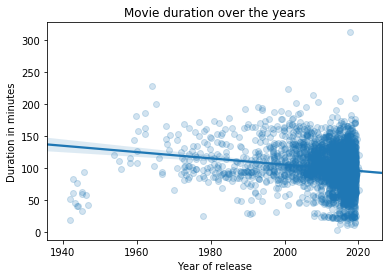

In [36]:
sb.regplot(data = df_duration, x = 'release_year', y = 'duration',
           fit_reg = True, y_jitter = 0.3, x_jitter = 0.3, scatter_kws = {'alpha' : 1/5})

plt.xlabel('Year of release')
plt.ylabel('Duration in minutes')
plt.title('Movie duration over the years');

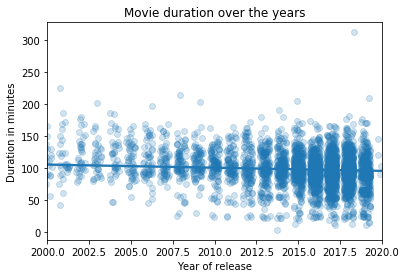

In [37]:
sb.regplot(data = df_duration, x = 'release_year', y = 'duration',
           fit_reg = True, y_jitter = 0.3, x_jitter = 0.3, scatter_kws = {'alpha' : 1/5})

plt.xlim(2000, 2020)
plt.xlabel('Year of release')
plt.ylabel('Duration in minutes')
plt.title('Movie duration over the years');

In [38]:
df_duration.corr()

,release_year,duration
release_year,1.000000,-0.170336
duration,-0.170336,1.000000


### 4) Conclusion 4:
- there is no significant correlation between year of release and the duration of a movie
- therefore we can not predict the duration of a movie with its release year. The dataset does not deliver another independent variable that we could use to predict the duration.
- In general it is difficult to find a dependent variable in this dataset. An interesting dependent variable would be movie/show rating, which we could get from IMDb https://www.imdb.com/chart/top/?ref_=nv_mv_250 or Rotten Tomatoes https://www.rottentomatoes.com/top

### 5) Further investigation of duration:
How do the genres differ in duration?

Movies can have multiple labels for genre. Therefore we need to include the value count in the dataframe to arrange the data for interpretable plotting:

hint: https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

In [39]:
df_duration.head()

,title,release_year,duration,listed_in
0,Norm of the North: King Sized Adventure,2019,90,"Children & Family Movies, Comedies"
1,Jandino: Whatever it Takes,2016,94,Stand-Up Comedy
4,#realityhigh,2017,99,Comedies
6,Automata,2014,110,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Fabrizio Copano: Solo pienso en mi,2017,60,Stand-Up Comedy


In [40]:
df_counts = df_duration.groupby(['listed_in']).transform(len).drop(columns = ['release_year', 'title'], axis = 1).rename(columns={'duration':'counts'})
df_counts.head(10)

,counts
0,129
1,273
4,73
6,8
7,273
9,2
10,273
11,103
12,120
13,120


In [41]:
df_concat = pd.concat([df_duration, df_counts], axis=1, sort=False)
df_sorted = df_concat.sort_values(by = 'counts', ascending=False)
df_sorted.head(300)

,title,release_year,duration,listed_in,counts
3994,Virunga: Gorillas in Peril,2015,29,Documentaries,299
4064,Water & Power: A California Heist,2017,78,Documentaries,299
412,Saudi Arabia Uncovered,2016,52,Documentaries,299
2606,Memory Games,2018,86,Documentaries,299
409,Holy Hell,2016,103,Documentaries,299
3745,Seeing Allred,2018,96,Documentaries,299
3187,Alien Contact: Outer Space,2017,63,Documentaries,299
4055,Liberated: The New Sexual Revolution,2017,86,Documentaries,299
4058,Mortified Nation,2013,84,Documentaries,299
1112,Harold and Lillian: A Hollywood Love Story,2015,95,Documentaries,299


Text(0.5,1,'Duration Boxplot')

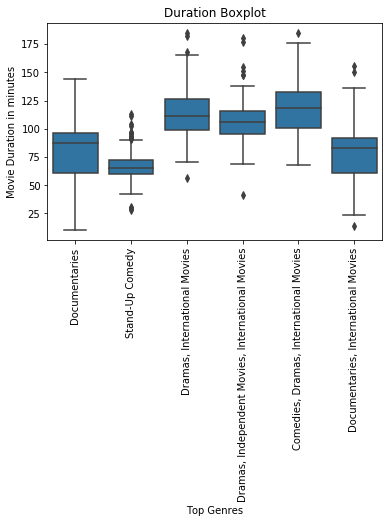

In [42]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df_sorted.iloc[0:1300,:], x = 'listed_in', y = 'duration', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Top Genres')
plt.ylabel('Movie Duration in minutes')
plt.title('Duration Boxplot')

### 5) Conclusion 5:
Within in the top genres 'Documentaries' has the highest variance in duration.
Stand-Up Comedy is rather limited to a duration around one hour, which could be due to a live-program of the artists.